In [11]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

In [12]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

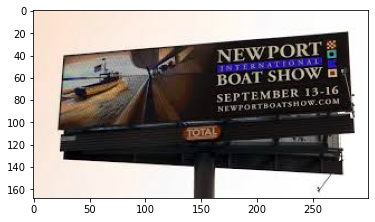

In [13]:
img=cv2.imread('billboard2.jpg')
plt.imshow(img)

In [14]:
img2char=pytesseract.image_to_string(img)

In [15]:
print(img2char)

NEWPORT &
BOAT SHOW 8+
SEPTEMBER 13

 



In [16]:
imgbox=pytesseract.image_to_boxes(img)

In [17]:
print(imgbox)

N 166 121 177 133 0
E 180 122 188 134 0
W 190 123 205 135 0
P 205 131 207 135 0
O 211 125 227 137 0
R 228 126 234 137 0
T 237 127 255 139 0
& 263 125 271 138 0
B 166 101 169 110 0
O 170 101 179 111 0
A 182 102 195 112 0
T 199 103 203 113 0
S 211 104 223 114 0
H 227 105 230 115 0
O 232 106 243 115 0
W 242 97 251 123 0
8 259 107 272 117 0
+ 276 113 278 115 0
S 165 87 170 92 0
E 172 86 175 93 0
P 180 87 185 94 0
T 189 88 191 94 0
E 196 88 198 95 0
M 204 89 208 95 0
B 211 86 220 97 0
E 224 90 225 96 0
R 231 90 237 97 0
1 245 91 247 97 0
3 252 92 255 98 0
~ 0 0 300 168 0



In [19]:
imgH,imgW,_=img.shape

In [20]:
print(img.shape)
for boxes in imgbox.splitlines():
    boxes=boxes.split(' ')
    x,y,w,h= int (boxes[1]), int (boxes[2]) , int (boxes[3]) , int (boxes[4])
    cv2.rectangle(img,(x,imgH-y),(w,imgH-h),(0,0,255),3)

(168, 300, 3)


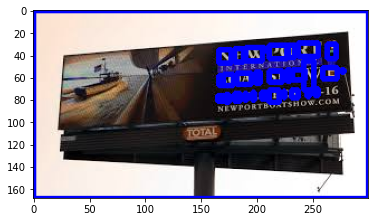

In [21]:
plt.imshow(img)

In [25]:
import numpy as np
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

cap=cv2.VideoCapture(0)
cntr=0
while True:
    ret,frame=cap.read()
    cntr=cntr+1
    if((cntr%20)==0):
        
        imgH,imgW,_=frame.shape
        
        x1,y1,w1,h1=0,0,imgH,imgW
        
        imgchar=pytesseract.image_to_string(frame)
        
        imgboxes=pytesseract.image_to_boxes(frame)
        
        for boxes in imgboxes.splitlines():
            boxes=boxes.split(' ')
            x,y,w,h= int (boxes[1]), int (boxes[2]) , int (boxes[3]) , int (boxes[4])
            cv2.rectangle(img,(x,imgH-y),(w,imgH-h),(0,0,255),3)
            
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),1)
        
        cv2.putText(frame,imgchar,(x1+int(w1/50),y1+int(h1/50)),font,0.7,(0,0,255),2)
        
        cv2.imshow("Fvfvs",frame)
        if(cv2.waitKey(2) & 0xFF== ord('q')):
            break
cap.release()
cv2.destroyAllWindows()